In [1]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [2]:
import pandas as pd
import numpy as np

tweet_data = pd.read_csv('./data/tweet_dataset.csv')
tweet_data.head(5)

,textID,sentiment,author,text,old_text,aux_id,new_sentiment,selected_text
0,1956967341,empty,xoshayzers,i know i was listenin to bad habit earlier a...,@tiffanylue i know i was listenin to bad habi...,p1000000000,NaN,NaN
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...,Layin n bed with a headache ughhhh...waitin o...,c811396dc2,negative,headache
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...,Funeral ceremony...gloomy friday...,9063631ab1,negative,gloomy
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!,wants to hang out with friends SOON!,2a815f151d,positive,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,We want to trade with someone who has Houston...,@dannycastillo We want to trade with someone w...,82565a56d3,neutral,We want to trade with someone who has Houston ...


In [3]:
tweet_data = tweet_data.loc[:,['sentiment', 'text']]
tweet_data.head(5)

,sentiment,text
0,empty,i know i was listenin to bad habit earlier a...
1,sadness,Layin n bed with a headache ughhhh...waitin o...
2,sadness,Funeral ceremony...gloomy friday...
3,enthusiasm,wants to hang out with friends SOON!
4,neutral,We want to trade with someone who has Houston...


In [4]:
category = tweet_data['sentiment'].unique()
len(category)

13

In [5]:
tweet_data['sentiment'] = tweet_data['sentiment'].replace(category, range(13))
tweet_data

,sentiment,text
0,0,i know i was listenin to bad habit earlier a...
1,1,Layin n bed with a headache ughhhh...waitin o...
2,1,Funeral ceremony...gloomy friday...
3,2,wants to hang out with friends SOON!
4,3,We want to trade with someone who has Houston...
...,...,...
39995,3,NaN
39996,6,Happy Mothers Day All my love
39997,6,Happy Mother`s Day to all the mommies out ther...
39998,9,WASSUP BEAUTIFUL!!! FOLLOW ME!! PEEP OUT MY ...


In [6]:
tweet_data.head(5)

,sentiment,text
0,0,i know i was listenin to bad habit earlier a...
1,1,Layin n bed with a headache ughhhh...waitin o...
2,1,Funeral ceremony...gloomy friday...
3,2,wants to hang out with friends SOON!
4,3,We want to trade with someone who has Houston...


In [7]:
tweet_data['text'] = tweet_data['text'].str.replace('[^\w]', " ")
tweet_data.head(5)

,sentiment,text
0,0,i know i was listenin to bad habit earlier a...
1,1,Layin n bed with a headache ughhhh waitin o...
2,1,Funeral ceremony gloomy friday
3,2,wants to hang out with friends SOON
4,3,We want to trade with someone who has Houston...


In [32]:
tweet_data['sentiment'] = tweet_data['sentiment'].replace("", np.nan)
tweet_data['text'] = tweet_data['text'].replace("", np.nan)

C:\Users\MyLaptop\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\MyLaptop\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [33]:
tweet_data = tweet_data.dropna(how='any')

In [34]:
from sklearn.model_selection import train_test_split

tweet_train, tweet_test, y_train, y_test = train_test_split(tweet_data['text'], tweet_data['sentiment'], shuffle=True)

In [39]:
stopwords = ['a', 'an']

X_train = []
for stc in tweet_train:
    token = []
    words = str(stc).split()
    for word in words:
        if word not in stopwords:
            token.append(word.lower())
    X_train.append(token)
    
X_test = []
for stc in tweet_test:
    token = []
    words = str(stc).split()
    for word in word:
        if word not in stopwords:
            token.append(word.lower())
    X_test.append(token)    

In [40]:
X_train

[['they',
  'are',
  'out',
  'of',
  'ice',
  'cream',
  'at',
  'the',
  'crazy',
  'mocha',
  'in',
  'ss',
  'this',
  'means',
  'no',
  'espresso',
  'milkshake'],
 ['no', 'omelette', 'today', 'dim', 'sum', 'tomorrow', 'feast'],
 ['cannot',
  'believe',
  'someone',
  'smashed',
  'my',
  'car',
  'window',
  'and',
  'stole',
  'my',
  'laptop',
  'they',
  'obviously',
  'dont',
  'have',
  'mum'],
 ['it',
  'looks',
  'like',
  'you',
  'have',
  'lot',
  'of',
  'fun',
  'with',
  'lady',
  'gaga'],
 ['is',
  'still',
  'awake',
  'at',
  '5am',
  'but',
  'for',
  'way',
  'better',
  'reasons',
  'a',
  'fantastic',
  'night',
  'with',
  'fantastic',
  'people',
  'and',
  'fantastic',
  'food'],
 ['ugh', '2', 'days', 'whatever', 'to', 'somewhere'],
 ['i',
  'hate',
  'when',
  'that',
  'happens',
  'i',
  'hope',
  'you',
  'figure',
  'it',
  'out',
  'soon'],
 ['awesome',
  'thats',
  'what',
  'im',
  'likewith',
  'the',
  'song',
  'paranoid',
  'its',
  'stuck',
  

In [44]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(7000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [14]:
print(len(tokenizer.word_index))

27961


In [15]:
low_count = 0

for word, word_count in tokenizer.word_counts.items():
    if word_count > 2:
        low_count += 1
print(low_count)

7501


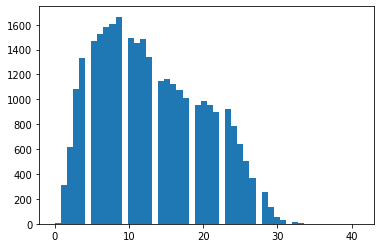

In [16]:
import matplotlib.pyplot as plt

len_stc = []
for data in X_train:
    len_stc.append(len(data))
    
y, x, _ = plt.hist(len_stc, bins=50)
plt.show()

In [45]:
max_len = 20
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [47]:
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

In [49]:
model = Sequential()
model.add(Embedding(7000, 120))
model.add(LSTM(120))
model.add(Dense(13, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',  optimizer='adam', metrics=['acc'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=128)

Train on 29950 samples, validate on 9984 samples
Epoch 1/5
29950/29950 [==============================] - 21s 699us/sample - loss: 2.0777 - acc: 0.2748 - val_loss: 2.3541 - val_acc: 0.2123
Epoch 2/5
29950/29950 [==============================] - 16s 523us/sample - loss: 1.8463 - acc: 0.3723 - val_loss: 2.4335 - val_acc: 0.2123462 - acc: 
Epoch 3/5
29950/29950 [==============================] - 16s 538us/sample - loss: 1.6989 - acc: 0.4299 - val_loss: 2.4722 - val_acc: 0.2123
Epoch 4/5
29950/29950 [==============================] - 16s 537us/sample - loss: 1.5705 - acc: 0.4741 - val_loss: 2.3617 - val_acc: 0.2123
Epoch 5/5
29950/29950 [==============================] - 16s 549us/sample - loss: 1.4389 - acc: 0.5198 - val_loss: 2.3795 - val_acc: 0.2123
